### Copyright © 2021, Chloe Wang

### Summary of Results

**Training accuracy**: 0.90239\
**Test accuracy**: 0.90073

**Question 1**\
Uses training data to predict whether a used car is <$12,000, and then uses available features to predict this constructed binary variable (codes below). 

**Question 2**\
Illustrates the most important features in constructing our predictions:\
![A3_ImportantFeats](A3_ImportantFeatures.png)


**Question 3**\
A graph that shows the training and test error-flexibility tradeoff (codes below).\
![A3_ErrorFlexTradeoff](A3_ErrorFlexibilityTradeoff.png)

### Confusion Matrix of Training Data
![A3_CMTrain](A3_ConfusionMatrix_Train.png)

### Confusion Matrix for Test Data
![A3_CMTest](A3_ConfusionMatrix_Test.png)

# Codes

In [1]:
# importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libaries for modelling and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [52]:
# reading the two csv files
small_df = pd.read_csv('6Z. final_predcomp_training_data_small.csv')
large_df = pd.read_csv('6Z. final_predcomp_training_data_large.csv')

In [53]:
# looking at the summary statistics
small_df.describe()

,id,price,year,odometer,cylinders,description_length,description_credit,description_owner,description_badcredit
count,2.999900e+04,29999.000000,29933.000000,26728.000000,19101.000000,29217.000000,29999.000000,29999.000000,29999.000000
mean,7.235216e+09,15879.012534,2010.724184,94720.290482,5.890425,2352.681521,0.413047,0.187906,0.155205
std,4.594456e+06,11152.826912,8.579819,61748.952567,1.609066,2120.058619,0.492389,0.390644,0.362106
min,7.213844e+09,2000.000000,1923.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7.231904e+09,6900.000000,2008.000000,42790.000000,4.000000,437.000000,0.000000,0.000000,0.000000
50%,7.236398e+09,12990.000000,2013.000000,90656.000000,6.000000,1808.000000,0.000000,0.000000,0.000000
75%,7.239320e+09,22990.000000,2016.000000,135740.250000,8.000000,4140.000000,1.000000,0.000000,0.000000
max,7.241018e+09,50000.000000,2021.000000,500000.000000,12.000000,9994.000000,1.000000,1.000000,1.000000


In [54]:
# missing values in the small dataset
small_df.isna().sum()

id                           0
price                        0
year                        66
odometer                  3271
cylinders                10898
transmission               126
drive                     8486
type                      7094
paint_color               8585
size                     21039
title_status               140
condition                11750
fuel                       210
state                      403
manufacturer               973
description_length         782
description_credit           0
description_owner            0
description_badcredit        0
dtype: int64

In [55]:
# looking at the summary statistics
large_df.describe()

,id,price,year,odometer,cylinders,description_length,description_credit,description_owner,description_badcredit
count,3.000000e+05,300000.000000,299376.000000,267456.000000,191090.000000,292201.000000,300000.000000,300000.000000,300000.000000
mean,7.235226e+09,15863.518507,2010.629423,94386.056742,5.888874,2379.174883,0.412167,0.186263,0.155067
std,4.595326e+06,11112.310328,8.771992,61497.290868,1.596020,2146.833466,0.492226,0.389320,0.361969
min,7.208550e+09,2000.000000,1900.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7.231949e+09,6900.000000,2008.000000,42971.750000,4.000000,439.000000,0.000000,0.000000,0.000000
50%,7.236401e+09,12991.000000,2013.000000,90054.500000,6.000000,1828.000000,0.000000,0.000000,0.000000
75%,7.239318e+09,22900.000000,2016.000000,135166.000000,8.000000,4160.000000,1.000000,0.000000,0.000000
max,7.241019e+09,50000.000000,2021.000000,500000.000000,12.000000,9999.000000,1.000000,1.000000,1.000000


In [56]:
# missing values in the large dataset
large_df.isna().sum()

id                            0
price                         0
year                        624
odometer                  32544
cylinders                108910
transmission               1344
drive                     85050
type                      71880
paint_color               85871
size                     210274
title_status               1398
condition                117743
fuel                       1931
state                      3787
manufacturer              10045
description_length         7799
description_credit            0
description_owner             0
description_badcredit         0
dtype: int64

# Defining Preprocessing Functions

In [57]:
def missing_value_impute(df):
  # let's create a dummy variable column for missing values by iterating through all columns
  # creating list to contain missing row indices
  missing_row = []

  # iterates through each row of large dataset
  for index, row in df.iterrows():
      
      # checks each column to see if there are any missing values
      missing_series = row.isnull()

      # if any of the columns return true, add to our missing row list
      if missing_series.any():
          missing_row.append(index)
  
  # adding the dummy variable column
  df.loc[missing_row, 'missing_value'] = 1

  # fill the dummy variable columns w/ 0 for rows w/ non-missing data
  df['missing_value'] = df['missing_value'].fillna(0)

  # creating a list for categorical and numerical values
  num_col = ['price', 'year', 'odometer', 'cylinders', 'description_length']

  cat_col = ['transmission', 'drive', 'type', 'paint_color',
            'size', 'title_status', 'condition', 'fuel',
            'state', 'manufacturer', 'description_credit',
             'description_owner', 'description_badcredit', 'missing_value']

  # imputing the missing values using the mean for numerical columns and mode for categorical
  # use for loop to loop through all columns
  for col in df.columns[1:]:
    if col in num_col:
      df[col] = df[col].fillna(df[col].mean())
    elif col in cat_col:
      df[col] = df[col].fillna(df[col].mode().values[0])

In [58]:
missing_value_impute(large_df)

In [59]:
# construct dummy variable for below $12,000
large_df['price_target'] = large_df['price'].apply(lambda x: 1 if x < 12000 else 0)

In [60]:
# list of numerical and categorical columns
num_col = ['year', 'odometer', 'cylinders', 'description_length']

cat_col = ['transmission', 'drive', 'type', 'paint_color',
          'size', 'title_status', 'condition', 'fuel',
          'state', 'manufacturer', 'description_credit',
            'description_owner', 'description_badcredit', 'missing_value']

In [61]:
# only want the categorical columns up to manufacturer, description columns already dummied
cat_col[:10]

['transmission',
 'drive',
 'type',
 'paint_color',
 'size',
 'title_status',
 'condition',
 'fuel',
 'state',
 'manufacturer']

In [62]:
def get_dummies(df):
  '''
  This function takes the train/test dataset and creates dummy variables for the known categorical variables.
  '''
  # using pandas get dummies function to create dummy variables for each categorical item
  dummy_df = pd.get_dummies(df[cat_col[:10]])

  # saving dummy feature names to list
  dummy_features = list(dummy_df.columns)

  # merging original df w/ the new dummy variable columns
  new_df = df.merge(dummy_df, left_index=True, right_index=True)

  # return/output the new merged df and the dummy feature column names
  return new_df, dummy_features

In [63]:
# using function to create new large df and the list of dummy column names
new_large_df, dummy_col = get_dummies(large_df)

In [64]:
# previewing new data set, it has 166 columns now counting non-dummy features
new_large_df.head()

,id,price,year,odometer,cylinders,transmission,drive,type,paint_color,size,...,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,7234568651,44989,2015.0,71639.0,8.000000,automatic,4wd,truck,white,full-size,...,0,0,0,0,0,0,0,0,0,0
1,7229694925,39988,2017.0,108531.0,5.888874,automatic,4wd,other,silver,full-size,...,0,0,0,0,0,0,0,0,0,0
2,7237581553,25990,2017.0,48931.0,5.888874,automatic,4wd,other,blue,full-size,...,0,0,0,0,0,0,0,1,0,0
3,7235261085,18990,2011.0,97792.0,8.000000,other,4wd,sedan,white,full-size,...,0,0,0,0,0,0,0,0,0,0
4,7235871752,39995,2017.0,121365.0,5.888874,automatic,4wd,sedan,white,full-size,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Set X and y
X = new_large_df.loc[:, num_col + dummy_col]
y = new_large_df['price_target']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Logistic Regression

In [43]:
# create logistic regression model
log_model = LogisticRegression()

# try cross val score
score = cross_val_score(log_model, X_train, y_train).mean()

# display score

print(f'Log model Cross Val Score: {score}')

Log model Cross Val Score: 0.7738285714285714


In [44]:
# create logistic regression model
log_model = LogisticRegression()

# fit logistic regression model
log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# train accuracy score
log_train_accuracy = log_model.score(X_train, y_train)

# display training accuracy score
print(f'Log Model Training Accuracy Score: {log_train_accuracy}')

Log Model Training Accuracy Score: 0.7603619047619048


In [46]:
# testing accuracy score
log_test_accuracy = log_model.score(X_test, y_test)

# display test accuracy score
print(f'Log Model Training Accuracy Score: {log_test_accuracy}')

Log Model Training Accuracy Score: 0.7597555555555555


# Decision Tree Classifier

In [47]:
# create decision tree model
dt_model = DecisionTreeClassifier()

# fit decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# train accuracy score
dt_train_accuracy = dt_model.score(X_train, y_train)

# display training accuracy score
print(f'DT Model Training Accuracy Score: {dt_train_accuracy}')

DT Model Training Accuracy Score: 0.9997142857142857


In [55]:
# testing accuracy score
dt_test_accuracy = dt_model.score(X_test, y_test)

# display test accuracy score
print(f'DT Model Test Accuracy Score: {dt_test_accuracy}')

DT Model Test Accuracy Score: 0.8935


In [50]:
# try using grid search to find better parameters
from sklearn.model_selection import GridSearchCV

# create decision tree model
dt_model = DecisionTreeClassifier()

# define parameters to test
parameters = {'max_depth':range(1,20,2),
              'min_samples_leaf':[1, 2, 5, 10],
              'max_features':[None,'auto']
              }

# creat grid search to find best parameter
clf = GridSearchCV(dt_model, parameters)

# fitting our grid search model
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20, 2),
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 2, 5, 10]})

In [51]:
# storing best parameter
best_param = clf.best_params_

# display best parameter
print(f'Best DT Model Parameters: {best_param}')

Best DT Model Parameters: {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 1}


In [56]:
# use the parameters from above to create decision tree model
# create decision tree model
dt_model = DecisionTreeClassifier(max_depth=19,
                                  min_samples_leaf=1)

# fit decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [57]:
# train accuracy score
dt_train_accuracy = dt_model.score(X_train, y_train)

# display training accuracy score
print(f'DT Model Training Accuracy Score: {dt_train_accuracy}')

DT Model Training Accuracy Score: 0.9566428571428571


In [58]:
# testing accuracy score
dt_test_accuracy = dt_model.score(X_test, y_test)

# display test accuracy score
print(f'DT Model Test Accuracy Score: {dt_test_accuracy}')

DT Model Test Accuracy Score: 0.9019


# KNN

In [31]:
# testing various K's to find the best non-overfitted value
k_value = []
training_accuracy = []
testing_accuracy = []

# use for-loop and cross_val_score to find the best k value
for k in range(1, 11):
    # add k to k_value list
    k_value.append(k)

    # create KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # fit model with our X and y
    score = cross_validate(knn_model, X_train, y_train, n_jobs=-1, return_train_score=True)

    # appending average accuracy per K
    training_accuracy.append(score['train_score'].mean())

    # appending average accuracy per K
    testing_accuracy.append(score['test_score'].mean())

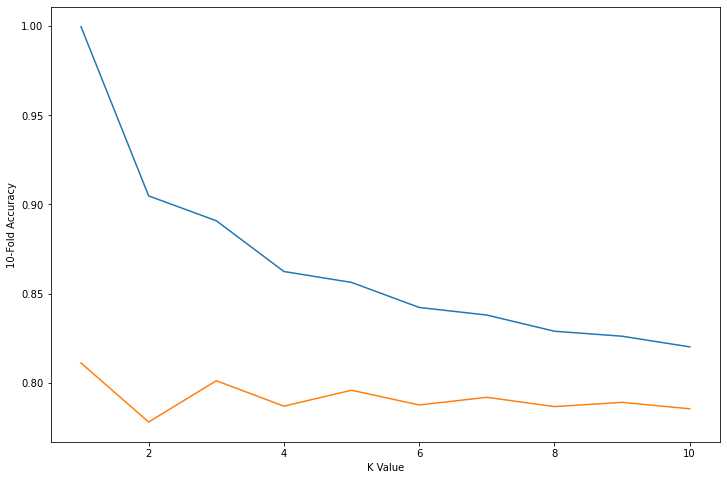

In [33]:
# plot knn_cv_score vs k_value to find best k_value
plt.figure(figsize=(12, 8))
plt.plot(k_value, training_accuracy)
plt.plot(k_value, testing_accuracy)
plt.xlabel('K Value')
plt.ylabel('10-Fold Accuracy')
plt.show()

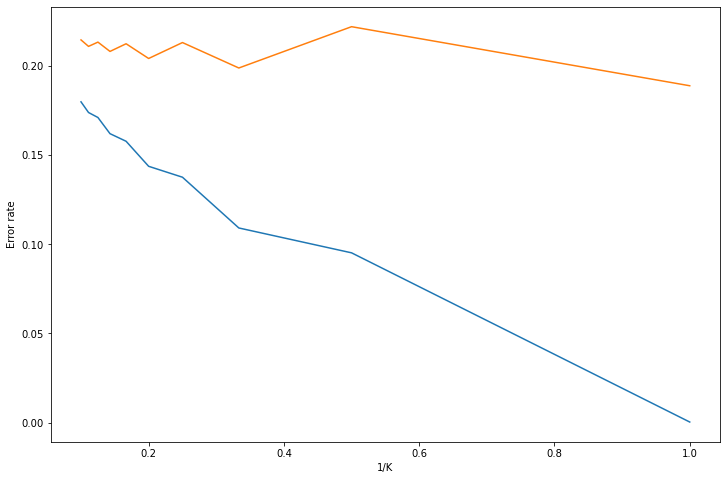

In [35]:
# plot knn_cv_score vs k_value to find best k_value
plt.figure(figsize=(12, 8))
plt.plot([1/k for k in k_value], [1-x for x in training_accuracy])
plt.plot([1/k for k in k_value], [1-x for x in testing_accuracy])
plt.xlabel('1/K')
plt.ylabel('Error rate')
plt.show()

From the two plots above, the best value of k to use is 3 for our KNN Model.

In [41]:
# creat KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# fit model with training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# display training and test accuracy
print(f'KNN Train Set Accuracy: {knn_model.score(X_train, y_train)}')
print(f'KNN Test Set Accuracy: {knn_model.score(X_test, y_test)}')

KNN Train Set Accuracy: 0.8959904761904762
KNN Test Set Accuracy: 0.8089444444444445


## Question 1

Our best model is the decision tree. Use the parameters from above to create decision tree model.

In [66]:
# create decision tree model
dt_model = DecisionTreeClassifier(max_depth=19,
min_samples_leaf=1)

# fit decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [67]:
# train accuracy score
dt_train_accuracy = dt_model.score(X_train, y_train)

# display training accuracy score
print(f'DT Model Training Accuracy Score: {dt_train_accuracy}')

DT Model Training Accuracy Score: 0.9567476190476191


In [68]:
# testing accuracy score
dt_test_accuracy = dt_model.score(X_test, y_test)

# display test accuracy score
print(f'DT Model Test Accuracy Score: {dt_test_accuracy}')

DT Model Test Accuracy Score: 0.9023888888888889


# Question 2

Plotting a figure that demonstrates which features are most important in constructing more accurate predictions.

In [69]:
# retrieve our feature importance from the model
feature_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

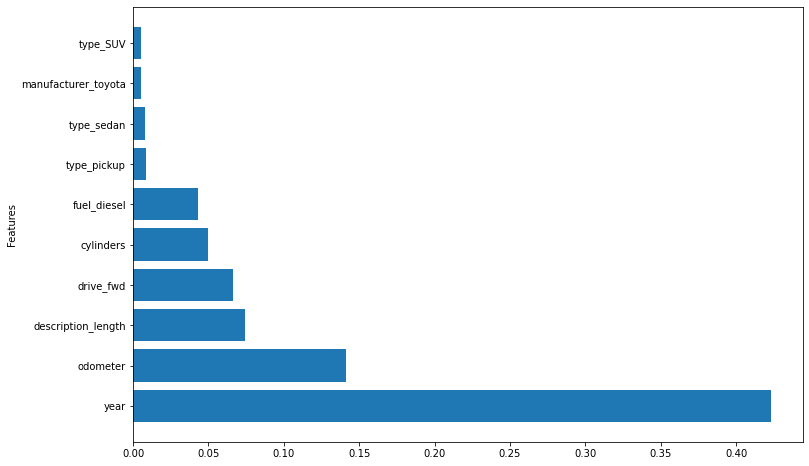

In [70]:
# plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance.index[:10], feature_importance.values[:10])
plt.ylabel('Features')
plt.show()

The most important features are year of the car, odometer, description length, drive forward, cylinders, and fuel.

# Question 3

In [71]:
# import function used to create clusters of data points normally distributed for classification
from sklearn.datasets import make_classification

# creating simulated data set
X_sim, y_sim = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [72]:
%%time
# (1) training error decreases as model 1/K increases
# (2) test error first decreases and then increases as 1/K increases

# create lists to store 1/K, training and testing errors
model_flexibility = []
training_error = []
testing_error = []

# creating a loop to modify the value of k to show
for k in range(1, 101):  
  # add 1/K to list
  model_flexibility.append(1/k)

  # creating KNN model with varying levels of k
  knn_model = KNeighborsClassifier(n_neighbors=k)
  
  # fit model with our X and y
  score = cross_validate(knn_model, X_sim, y_sim, n_jobs=-1, return_train_score=True)

  # appending average error rate per K
  training_error.append(1 - score['train_score'].mean())

  # appending average error rate per K
  testing_error.append(1 - score['test_score'].mean())


Wall time: 3.41 s


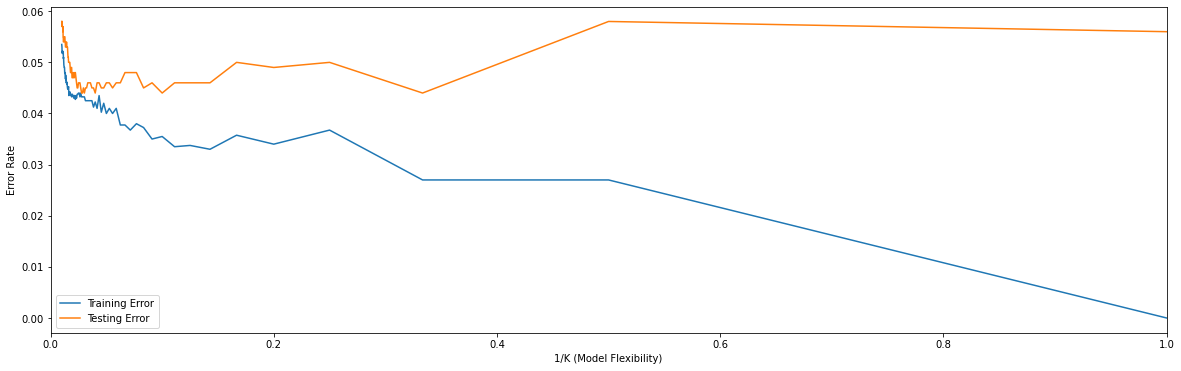

In [73]:
# plotting the scores
plt.figure(figsize=(20, 6))
plt.plot(model_flexibility, training_error, label = 'Training Error')
plt.plot(model_flexibility, testing_error, label = 'Testing Error')

plt.xlim((0,1))
plt.xlabel('1/K (Model Flexibility)')
plt.ylabel('Error Rate')

plt.legend()
plt.show()
# plt.xticks([0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])

# Submission 2 - Test Data Results

In [74]:
# loading the test data set
test_df = pd.read_csv('6Zz. final_predcomp_test_data (1).csv')

In [75]:
# Redefining functiont to impute missing values
def missing_value_impute(df):
  # let's create a dummy variable column for missing values by iterating through all columns
  # creating list to contain missing row indices
  missing_row = []

  # iterates through each row of large dataset
  for index, row in df.iterrows():
      
      # checks each column to see if there are any missing values
      missing_series = row.isnull()

      # if any of the columns return true, add to our missing row list
      if missing_series.any():
          missing_row.append(index)
  
  # adding the dummy variable column
  df.loc[missing_row, 'missing_value'] = 1

  # fill the dummy variable columns w/ 0 for rows w/ non-missing data
  df['missing_value'] = df['missing_value'].fillna(0)

  # creating a list for categorical and numerical values
  num_col = ['price', 'year', 'odometer', 'cylinders', 'description_length']

  cat_col = ['transmission', 'drive', 'type', 'paint_color',
            'size', 'title_status', 'condition', 'fuel',
            'state', 'manufacturer', 'description_credit',
             'description_owner', 'description_badcredit', 'missing_value']

  # imputing the missing values using the mean for numerical columns and mode for categorical
  # use for loop to loop through all columns
  for col in df.columns[1:]:
    if col in num_col:
      df[col] = df[col].fillna(df[col].mean())
    elif col in cat_col:
      df[col] = df[col].fillna(df[col].mode().values[0])

In [76]:
# use the created function to impute the missing values and create missing value dummy variable
missing_value_impute(test_df)

In [77]:
# construct dummy variable for below $12,000
test_df['price_target'] = test_df['price'].apply(lambda x: 1 if x < 12000 else 0)

In [78]:
# list of categorical columns
num_col = ['year', 'odometer', 'cylinders', 'description_length']

cat_col = ['transmission', 'drive', 'type', 'paint_color',
        'size', 'title_status', 'condition', 'fuel',
        'state', 'manufacturer', 'description_credit', 'description_owner',
        'description_badcredit', 'missing_value']

# creating a function for dummy variables 
def get_dummies(df):
    '''
    This function takes the train/test dataset and creates dummy variables for the known categorical variables.
    '''
    # using pandas get dummies function to create dummy variables for each categorical item
    dummy_df = pd.get_dummies(df[cat_col[:10]])

    # saving dummy feature names to list
    dummy_features = list(dummy_df.columns)

    # merging original df w/ the new dummy variable columns
    new_df = df.merge(dummy_df, left_index=True, right_index=True)

    # return/output the new merged df and the dummy feature column names
    return new_df, dummy_features

In [79]:
# using function to create new large df and the list of dummy column names
new_test_df, dummy_col = get_dummies(test_df)

In [80]:
# splitting the test data set into X and y
# Set X and y
X_testdata = new_test_df.loc[:, num_col + dummy_col]
y_testdata = new_test_df['price_target']

In [81]:
# Get unique list of columns from training and test data and then find the difference
missing_cols = set(X.columns) - set(X_testdata.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_testdata[c] = 0
    
# Ensure the order of column in the test set is in the same order as in training set
X_testdata = X_testdata[X.columns]

In [84]:
# predicting y^ for test data
test_predictions = dt_model.predict(X_testdata)

# returning accuracy score
print(f'Test data accuracy: {dt_model.score(X_testdata,y_testdata)}')

Test data accuracy: 0.9007333333333334


# Confusion Matrix

In [88]:
# importing confusion matrix functions from sklearn library
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Training Set

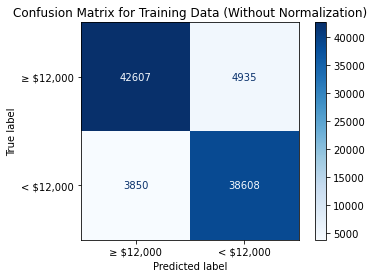

In [105]:
# Plot non-normalized (count statistics) confusion matrix
disp = plot_confusion_matrix(dt_model, X_test, y_test,
                             display_labels=['≥ $12,000','< $12,000'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion Matrix for Training Data (Without Normalization)")

# print(title)
# print(disp.confusion_matrix)

plt.show()

### Test Set

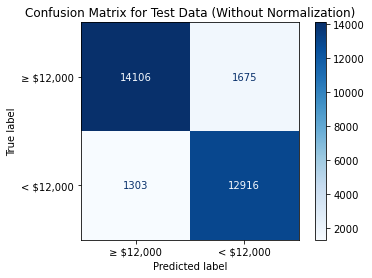

In [104]:
# Plot non-normalized (count statistics) confusion matrix
disp = plot_confusion_matrix(dt_model, X_testdata, y_testdata,
                             display_labels=['≥ $12,000','< $12,000'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion Matrix for Test Data (Without Normalization)")

# print(title)
# print(disp.confusion_matrix)

plt.show()